# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu:
Członkowie: Cyprian Szot, Bartłomiej Żurek, Marcin Szewczyk

---

# Zestaw zadań 12: Analiza wariancji

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Funkcje do wykorzystania

In [3]:
def vizualize_test_result(pdf, statistic, rejection_region):
    """
    Parameters
    -------
    pdf: pandas.DataFrame
        Tablica zawierająca informacje niezbędne do wykreślenia funkcji gęstości prawdopodobieństwa wykorzystywanego w teście rozkładu
        teoretycznego - index z wariantami zmiennej losowej i nadaną nazwą zmiennej (np. x) oraz pojedynczą kolumnę z wartościami
        gęstościami prawdopodobieństwa wyliczonymi dla poszczególnych wariantów o nadanej nazwie bazującej na nazwie zmiennej (np. f(x)).
    statistic: float
        Wartość statystyki testowej wyliczonej na podstawie próby losowej.
    rejection_region: list
        Lista zawierająca trzy elementy pozwalające na określenie obszaru krytycznego w następującej kolejności:
         - wartość dolnej granicy przedziału,
         - wartość górnej granicy przedziału,
         - "inner" lub "outer" w zależności od tego, czy ma być zakolorowana wewnętrzna, czy zewnętrzna część przedziału.
    """
    pdf_name= pdf.columns[0]
    
    fig, axes = plt.subplots(1, 1, figsize=(8, 3), facecolor='white')

    axes.plot(pdf.index, pdf[pdf_name], color="grey")

    if rejection_region[2]=="inner":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index > rejection_region[0]) & (pdf.index<rejection_region[1])), color='red', alpha=0.5)
    elif rejection_region[2]=="outer":
        axes.fill_between(pdf.index, pdf[pdf_name], 0, where=((pdf.index < rejection_region[0]) | (pdf.index>rejection_region[1])), color='red', alpha=0.5)
    
    axes.vlines(x=statistic, ymin=0, ymax=np.max(pdf[pdf_name]/3), color="blue")
    
    axes.set_xlabel(pdf.index.name)
    axes.set_ylabel(pdf_name)
    
def vizualize_HSD_test_result(HSD, HSD_alpha):
    """
    Parameters
    -------
    HSD: DataFrame
        Tablica zawierająca wartości statystyki HSD wyliczonych na podstawie poszczególnych par porównywanych prób losowych.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    HSD_alpha: float
        Wartość statystyki HSD_alpha.    
    """
    fig, axes = plt.subplots(1, 1, figsize=(6,6), facecolor='white')
    axes = sns.heatmap(HSD, ax=axes, annot=True, annot_kws={"size": 10}, fmt=".3f", cmap="coolwarm", center=HSD_alpha)
    axes.set_xlabel("Próbki losowe")
    axes.set_ylabel("Próbki losowe")

### Dane do zadań

W celu wygenerowania danych wykorzystywanych w zawartych w notatniku zadaniach i komórkach testowych wykonaj poniższe komórki.

In [4]:
# Dane do testów 1
test_data_1 = pd.DataFrame(columns=["A1", "A2", "A3"])
test_data_1["A1"] = [1802, 1992, 1854, 1880, 1761, 1900]
test_data_1["A2"] = [1664, 1755, 1823, 1862, np.nan, np.nan]
test_data_1["A3"] = [1877, 1710, 1882, 1720, 1950, np.nan]
test_data_1

,A1,A2,A3
0,1802,1664.0,1877.0
1,1992,1755.0,1710.0
2,1854,1823.0,1882.0
3,1880,1862.0,1720.0
4,1761,NaN,1950.0
5,1900,NaN,NaN


In [5]:
# Dane do testów 2
test_data_2 = pd.DataFrame(columns=["B1", "B2", "B3"])
test_data_2["B1"] = [9, 8, 7, 5]
test_data_2["B2"] = [9, 7, 6, 5]
test_data_2["B3"] = [4, 3, 1, 1]
test_data_2

,B1,B2,B3
0,9,9,4
1,8,7,3
2,7,6,1
3,5,5,1


In [6]:
# Dane do testów 3
test_data_3 = pd.DataFrame(columns=["C1", "C2", "C3", "C4", "C5", "C6"])
test_data_3["C1"] = np.hstack([sp.stats.norm.rvs(0.03, 1.5, 38, random_state=17), np.full(12, np.NaN)])
test_data_3["C2"] = np.hstack([sp.stats.norm.rvs(0.42, 1.5, 45, random_state=43), np.full(5, np.NaN)])
test_data_3["C3"] = np.hstack([sp.stats.norm.rvs(-0.12, 1.5, 42, random_state=14), np.full(8, np.NaN)])
test_data_3["C4"] = sp.stats.norm.rvs(0.06, 1.5, 50, random_state=18)
test_data_3["C5"] = np.hstack([sp.stats.norm.rvs(-0.39, 1.5, 43, random_state=123), np.full(7, np.NaN)])
test_data_3["C6"] = np.hstack([sp.stats.norm.rvs(0.12, 1.5, 39, random_state=13), np.full(11, np.NaN)])
test_data_3.head()

,C1,C2,C3,C4,C5,C6
0,0.444399,0.806100,2.207009,0.179143,-2.018446,-0.948586
1,-2.751942,-0.942722,-0.001221,3.345304,1.106018,1.250650
2,0.965852,-0.147755,0.140965,-0.142338,0.034468,0.053245
3,1.747967,-0.382373,-0.228505,0.300777,-2.649442,0.797719
4,1.585786,1.707110,-3.126494,0.724047,-1.257900,2.137653


### Zadanie 1: Jednoczynnikowa analiza wariancji [7 pkt]

Przygotuj funkcję `one_way_anova()`, która będzie weryfikować hipotezę o równości wartości przeciętnych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_test_result()` do generowania wykresu zawierającego:
- funkcję gęstości prawdopodobieństwa rozkładu teoretycznego wykorzystywanego w teście w zakresie od wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.0001 do wartości, dla której dystrybuanta tego rozkładu przyjmuje wartość 0.9999,
- zaznaczony wyróżniającym się kolorem fragmentem pola pod krzywą odpowiadający wyznaczonemu w teście obszarowi krytycznemu,
- wyróżniającą się kolorem pionowę linię wskazującą obliczoną wartość statystyki.

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne napisanie funkcji od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających analizę wariancji.

In [7]:
def one_way_anova(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych. Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    F: float
        Wyliczona na podstawie próby losowej wartość statystyki F.
    F_alpha: float
        Wartość statystyki F_alpha.
    H: int
        Wynik testu statystycznego, przyjmuje wartość:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
    """
    k = len(data.columns)
    n = np.sum(data.count())
    n_values = data.count()
    mean_values = data.mean()    
    mean = data.stack().mean()
    dk = k-1
    dn = n-k
    
    q_g = np.sum(n_values * (mean_values - mean)**2)

    temp = ((data - mean_values)**2).stack()
    q_r = temp.sum()
    
    F = (q_g / dk) / (q_r / dn)
    
    F_alpha = sp.stats.f.ppf(1 - alpha, dk, dn)
    
    H = 1 if F >= F_alpha else 0
    
    x = np.linspace(sp.stats.f.ppf(0.0001, k-1, n-k), sp.stats.f.ppf(0.9999, k-1, n-k), 1000)
    pdf = pd.DataFrame( data = sp.stats.f.pdf(x, dk, dn), index = x, columns = ["p(x)"])
    pdf.index.name = "x"
       
    vizualize_test_result(pdf, F, [F_alpha, np.inf, "outer"])
    
    return F, F_alpha, H
   

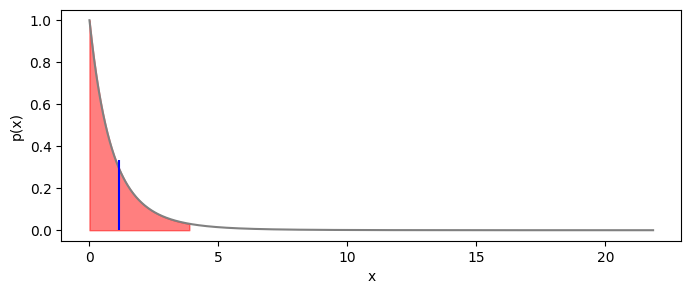

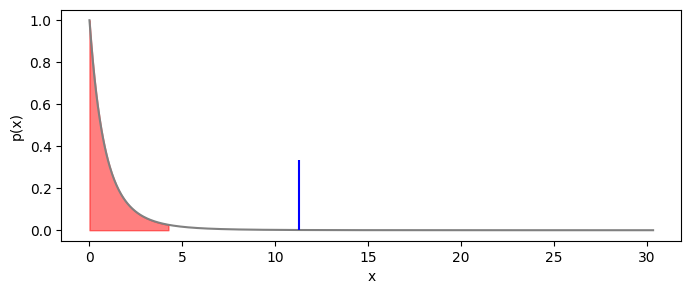

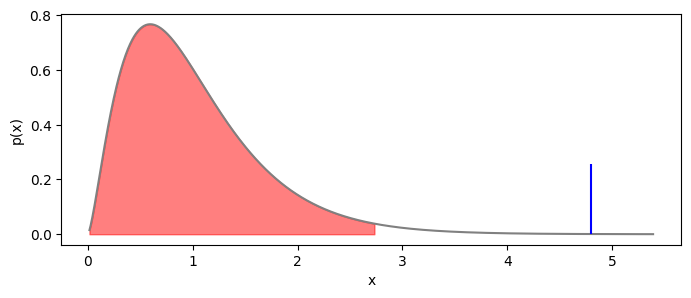

In [8]:
### Komórka testowa
assert np.all(np.isclose(one_way_anova(test_data_1, 0.05), (1.127072228543553, 3.8852938346523946, 0)))
assert np.all(np.isclose(one_way_anova(test_data_2, 0.05), (11.25773195876289, 4.256494729093748, 1)))
assert np.all(np.isclose(one_way_anova(test_data_3, 0.02), (4.79388401864753, 2.7336800410268243, 1)))

### Zadanie 2: Test HSD Tukeya [8 pkt]

Przygotuj funkcję `tukey_HSD_test()`, która będzie przeprowadzać test HSD Tukeya dla wszystkich par prób losowych w analizowanym zestawie danych i wyświetlać wynik testu statystycznego zgodnie z wytycznymi zawartymi w treści zadania oraz w docstring funkcji.

Poza zwracaniem zmiennych wymienionych w docsting funkcji, które są potrzebne do przeprowadzenia automatycznych testów funkcji powinna wykorzystywać udostępnioną na początku notatnika funkcję `vizualize_HSD_test_result()` do generowania wykresu zawierającego:
 - wykres heatmap wyników testu ze skalą kolorów ustaqioną na coolwarm wycentrowaną na wartości statystyki HSD_alpha (odcienie ciepłe dla pól o wartości współczynnika HSD większej od HSD_alpha, odcienie zimne dla pól o wartości współczynnika HSD mniejszej od HSD_alpha).

Uwaga! Celem zadanie jest zapoznanie się ze schematem metody i samodzielne funkcji napisanie od podstaw. W związku z tym podczas rozwiązywania zadania nie należy korzystać z gotowych funkcji przeprowadzających testu HSD Tukeya. W celu otrzymania wartości parametru `HSD_alpha` należy skorzystać z funkcji modułu `sp.stats.studentized_range`.

In [9]:
def tukey_HSD_test(data, alpha):
    """
    data: DataFrame
        Tablica zawierająca domyślny indeks i dowolnie nazwane kolumny (nazwy prób losowych) z wynikami prób losowych.
        Znajdujące się w tablicy wartości NaN nie są wynikami wchodzącymi w skład prób losowych,
        a jedynie uzupełniają puste miejsca w tablicy powstałe na skutek różnej liczebności poszczególnych prób.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    HSD: DataFrame
        Tablica zawierająca wartości statystyki HSD wyliczonych na podstawie poszczególnych par porównywanych prób losowych.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    HSD_alpha: float
        Wartość statystyki HSD_alpha.
    H: DataFrame
        Tablica zawierająca wartości int określające wynik testu dla poszczególnych par porównywanych prób losowych:
        0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha,
        1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha.
        Nazwy kolumn i wierszy tablicy odpowiadają nazwom poszczególnych prób losowych.
    """ 
   
    suma = 0
    n = 0
    dlugosc = len(data.columns)
    for j in range(dlugosc):
        value = data.iloc[:,j].dropna()
        n += len(value.index)
        suma += np.sum( ( (value-np.mean(value) ) ) **2)
    
    temp = suma / (2* (n - len(data.columns) ) )
    HSD_alpha = sp.stats.studentized_range.ppf(1-alpha, dlugosc, n - dlugosc)
    HSD = np.empty([dlugosc, dlugosc])
    H = np.empty([dlugosc, dlugosc])
                  
    for i in range(dlugosc):
        for j in range(dlugosc):
            temp2 = np.sqrt(temp * ( 1/len(data.iloc[:,i].dropna() ) + 1/len(data.iloc[:,j].dropna() ) ) )
            HSD[i][j] = (abs( np.mean(data.iloc[:,i]) - np.mean(data.iloc[:,j] ) ) ) / temp2
            if HSD[i][j] >= HSD_alpha:
                H[i][j] = 1
            else:
                H[i][j] = 0
            

    HSD = pd.DataFrame(HSD, index = data.columns, columns=data.columns)
    H = pd.DataFrame(H, index = data.columns, columns=data.columns)
    
    vizualize_HSD_test_result(HSD, HSD_alpha)


    return HSD, HSD_alpha, H

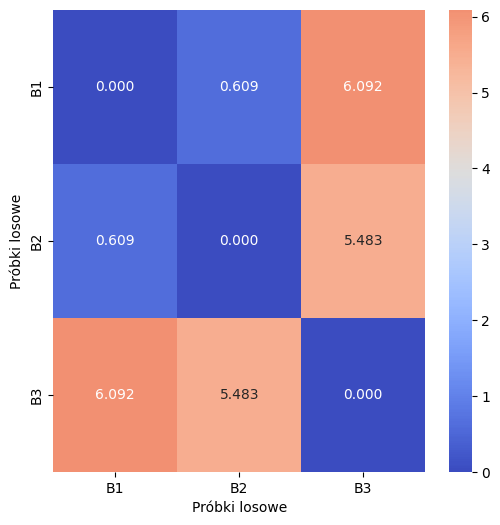

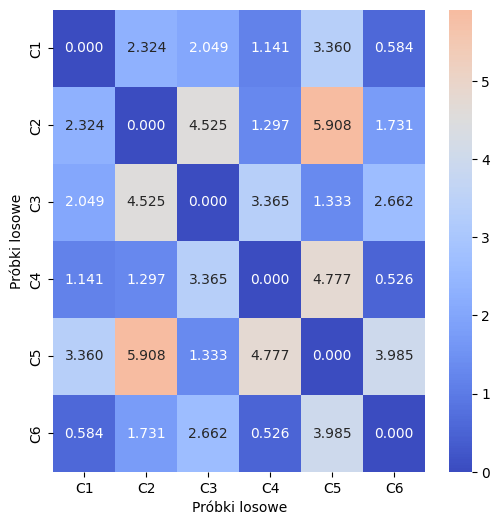

In [10]:
### Komórka testowa

HSD, HSD_alpha, H = tukey_HSD_test(test_data_2, 0.05)
# Test 1 Kształt tablicy
assert HSD.shape == (3, 3)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(HSD.index)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.columns)) & set(['B1', 'B2', 'B3'])) == 3
assert len(set(list(H.index)) & set(['B1', 'B2', 'B3'])) == 3
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0., 0.6092077, 6.09207699], [0.6092077, 0., 5.48286929], [6.09207699, 5.48286929, 0.]])))
assert np.isclose(HSD_alpha, 3.948492203457512)
assert np.all(np.isclose(H.values , np.array([[0, 0, 1], [0, 0, 1], [1, 1, 0]])))

HSD, HSD_alpha, H = tukey_HSD_test(test_data_3, 0.02)
# Test 1 Kształt tablicy
assert HSD.shape == (6, 6)
# Test 2 Kolumny i indeks
assert len(set(list(HSD.columns)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
assert len(set(list(HSD.index)) & set(["C1", "C2", "C3", "C4", "C5", "C6"])) == 6
# Test 3 Wartości 
assert np.all(np.isclose(HSD.values , np.array([[0.       , 2.32398801, 2.04925654, 1.14092171, 3.35959821, 0.58434888],
                                               [2.32398801, 0.        , 4.52485149, 1.29679893, 5.90844249, 1.73148729],
                                               [2.04925654, 4.52485149, 0.        , 3.36510324, 1.33306438, 2.66216438],
                                               [1.14092171, 1.29679893, 3.36510324, 0.        , 4.77709994, 0.52585424],
                                               [3.35959821, 5.90844249, 1.33306438, 4.77709994, 0.        , 3.98505536],
                                               [0.58434888, 1.73148729, 2.66216438, 0.52585424, 3.98505536, 0.        ]])))
assert np.isclose(HSD_alpha, 4.50539007862777)
assert np.all(np.isclose(H.values , np.array([[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0],
                                               [0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0],
                                               [0, 1, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0]])))

### Zadanie 3: Wykorzystanie dedykowanych funkcji [5 pkt]

#### a)
Korzystając z funkcji `sp.stats.f_oneway()` zweryfikuj hipotezę o równości wartości średnich zmiennych zawartych w zmiennej `test_data_2`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue_1`, oraz przygotuj zmienną `H_1` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - ustaw następującą wartość argumentu funkcji wykonującej test statystyczny odpowiedzialnego za radzenie sobie z wartościami nan: `nan_policy="omit"`.

In [15]:
# YOUR CODE HERE
alpha = 0.05

anova_result = sp.stats.f_oneway(*[test_data_2[col] for col in test_data_2.columns], nan_policy="omit")

pvalue_1 = anova_result.pvalue

H_1 = 0
if pvalue_1 >= 0.95:
    H_1 = 1
if pvalue_1 <= 0.05:
    H_1 = 1
pvalue_1, H_1

(0.003554140748362928, 1)

In [16]:
# Komórka testowa
assert np.isclose(pvalue_1, 0.003554140748362928)
assert H_1 == 1

#### b)
Korzystając z funkcji `sp.stats.tukey_hsd()` zweryfikuj hipotezę o równości wartości średnich poszczególnych par zmiennych zawartych w zmiennej `test_data_2`. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.95.

Zapisz obliczone wartości pvalue do zmiennej `pvalue_2` (będzie to macierz), oraz przygotuj zmienną `H_2` zawierającą wynik testów statystycznych (macierz zawierająca: 0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

Uwagi do wykonania zadania:
 - funkcja `sp.stats.tukey_hsd()` wymaga wcześniejszego usunięcia z danych wartości NaN.

In [17]:
test_data_2 = test_data_2.dropna()

result = sp.stats.tukey_hsd(test_data_2["B1"], test_data_2["B2"], test_data_2["B3"] )

pvalue_2 = result.pvalue

alpha = 0.05

H_2 = np.zeros_like(pvalue_2)

mask1 = (pvalue_2 <= alpha)  

H_2[mask1] = 1
H_2

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 0.]])

In [18]:
# Komórka testowa
assert np.all(np.isclose(pvalue_2, np.array([[1.,         0.90382813, 0.00501795],
                                             [0.90382813, 1.,         0.0094373 ],
                                             [0.00501795, 0.0094373,  1.        ]])))
assert np.all(np.isclose(H_2, np.array([[0, 0, 1],
                                        [0, 0, 1],
                                        [1, 1, 0]])))